#HW #3
## GitHub Link: https://github.com/garcimat/EE399/tree/HW3

###Part 1:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.T.astype(float)
Y = mnist.target.astype(int)

# SVD analysis
U, S, Vt = np.linalg.svd(X, full_matrices=False)
V = Vt.T
r = np.argmax(np.diff(S) < 0.01*S[0]) + 1

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


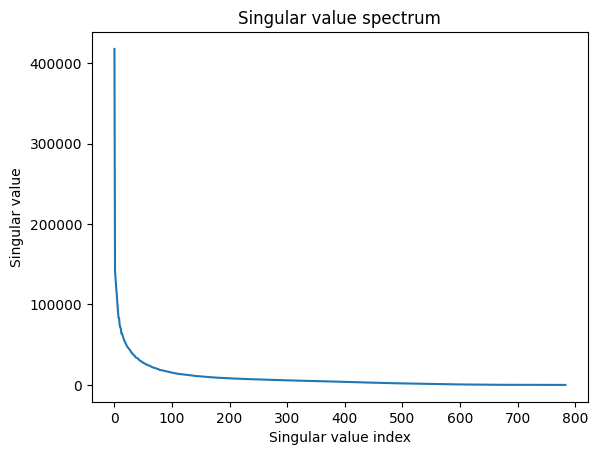

The rank of the digit space is: 714


In [3]:
# 2.
# Visualize singular value spectrum
plt.plot(S)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular value spectrum')
plt.show()

# Determine the rank of the digit space
r = np.sum(S > 1e-10)
print('The rank of the digit space is:', r)

In [ ]:
# 3.
# Interpretations of U, S, and V matrices
# U: the left singular vectors, which represent the image space
# S: the singular values, which represent the importance of each singular vector
# V: the right singular vectors, which represent the feature space

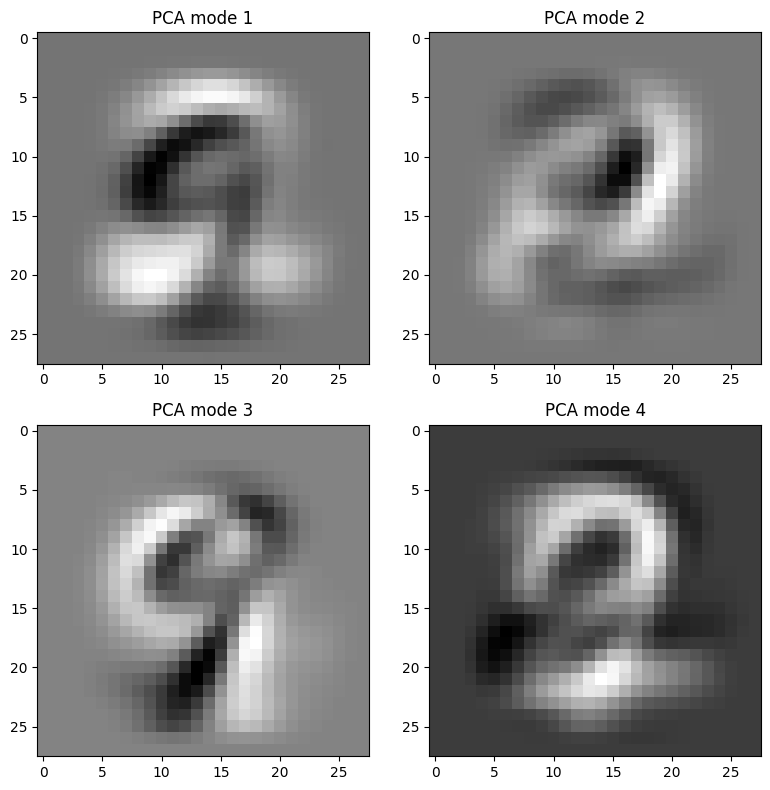

In [15]:
# Plots of first 4 principal components

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Plot the first 4 principal components
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axs = axs.ravel()

for i in range(4):
    axs[i].imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f'PCA mode {i+1}')

plt.tight_layout()
plt.show()

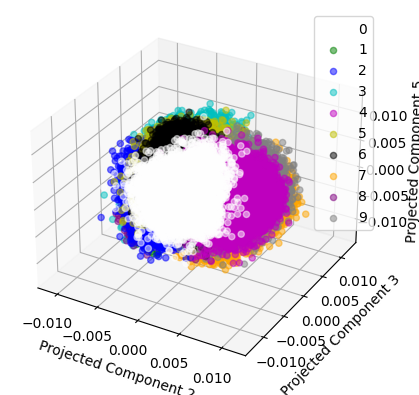

In [4]:
# 4.
# 3D plot of projected data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cols = ['white', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'gray']

for i in range(10):
    mask = Y == i
    ax.scatter(V[mask, 2], V[mask, 3], V[mask, 5], c=cols[i], label=str(i), alpha=0.5)
ax.set_xlabel('Projected Component 2')
ax.set_ylabel('Projected Component 3')
ax.set_zlabel('Projected Component 5')
plt.legend()
plt.show()

###Part 2:

In [5]:
# 1.
X = mnist.data.astype(float)
Y = mnist.target.astype(int)

# Select only digits 1 and 4
idx = np.logical_or(Y == 1, Y == 4)
X = X[idx]
Y = Y[idx]
Y[Y == 1] = 0  # class 0: digit 1
Y[Y == 4] = 1  # class 1: digit 4

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Test LDA classifier
Y_pred = lda.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [6]:
# 2. 
# Select only digits 1, 3, and 8
idx = np.logical_or(Y == 1, np.logical_or(Y == 3, Y == 8))
X = X[idx]
Y = Y[idx]
Y[Y == 1] = 0  # class 0: digit 3
Y[Y == 3] = 1  # class 1: digit 5
Y[Y == 8] = 2  # class 2: digit 8

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Test LDA classifier
Y_pred = lda.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [14]:
# 3 & 4.

# // Hardest to Distinguish: Digits 4 & 9 \\
# // Easiest to Distinguish: Digits 2 & 9 \\

X = mnist.data.astype(float)
Y = mnist.target.astype(int)

# Select only digits 4 and 9
idx = np.logical_or(Y == 4, Y == 9)
X = X[idx]
Y = Y[idx]
Y[Y == 4] = 0  # class 0: digit 4
Y[Y == 9] = 1  # class 1: digit 9

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Test LDA classifier
Y_pred = lda.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of Digits 4 & 9: {accuracy:.2f}")

X = mnist.data.astype(float)
Y = mnist.target.astype(int)

#///////////////////////////////////////

# Select only digits 2 and 9
idx = np.logical_or(Y == 2, Y == 9)
X = X[idx]
Y = Y[idx]
Y[Y == 2] = 0  # class 0: digit 2
Y[Y == 9] = 1  # class 1: digit 9

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Test LDA classifier
Y_pred = lda.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of Digits 2 & 9: {accuracy:.2f}")

Accuracy of Digits 4 & 9: 0.96
Accuracy of Digits 2 & 9: 0.99


In [8]:
# 5.1.
from sklearn import svm

# // SVM \\

X = mnist.data.astype(float)
Y = mnist.target.astype(int)

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train SVM classifier
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')
clf.fit(X_train, Y_train)

# Evaluate classifier on test set
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {acc:.3f}")

Accuracy on test set: 0.976


In [9]:
# 5.2.

# // Decision Tree Classifier \\

X = mnist.data.astype(float)
Y = mnist.target.astype(int)

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

# Evaluate classifier on test set
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {acc:.3f}")

Accuracy on test set: 0.870


In [10]:
# 5.3. 

# // LDA \\

X = mnist.data.astype(float)
Y = mnist.target.astype(int)

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train LDA classifier
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)

# Evaluate classifier on test set
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {acc:.3f}")

Accuracy on test set: 0.868


In [11]:
# 6.1.
# SVM:

# Load MNIST dataset and select only digits 4 and 9
X = mnist.data.astype(float)
Y = mnist.target.astype(int)

# Keep only digits 4 and 9
idx = (Y == 4) | (Y == 9)
X = X[idx]
Y = Y[idx]
Y[Y==4] = 0  # rename digit 4 to class 0
Y[Y==9] = 1  # rename digit 9 to class 1

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, Y_train)

# Evaluate classifier on test set
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {acc:.3f}")

Accuracy on test set: 0.984


In [12]:
# 6.2.
# Decision Tree Classifier:

# Load MNIST dataset and select only digits 4 and 9
X = mnist.data.astype(float)
Y = mnist.target.astype(int)

# Keep only digits 4 and 9
idx = (Y == 4) | (Y == 9)
X = X[idx]
Y = Y[idx]
Y[Y==4] = 0  # rename digit 4 to class 0
Y[Y==9] = 1  # rename digit 9 to class 1

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, Y_train)

# Evaluate classifier on test set
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test set: {acc:.3f}")

Accuracy on test set: 0.934


In [13]:
# 6.3.
# Load MNIST dataset and select only digits 2 and 9
X = mnist.data.astype(float)
Y = mnist.target.astype(int)
idx = (Y == 2) | (Y == 9)
X = X[idx]
Y = Y[idx]
Y[Y == 2] = 0
Y[Y == 9] = 1

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Train SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train)

# Train decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

# Evaluate classifiers on test set
Y_pred_lda = lda.predict(X_test)
Y_pred_svm = svm.predict(X_test)
Y_pred_dt = dt.predict(X_test)
acc_lda = accuracy_score(Y_test, Y_pred_lda)
acc_svm = accuracy_score(Y_test, Y_pred_svm)
acc_dt = accuracy_score(Y_test, Y_pred_dt)

# Print results
print(f"LDA accuracy: {acc_lda:.3f}")
print(f"SVM accuracy: {acc_svm:.3f}")
print(f"Decision tree accuracy: {acc_dt:.3f}")

LDA accuracy: 0.986
SVM accuracy: 0.983
Decision tree accuracy: 0.977
